In [1]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
import zipfile
import os

zip_path = "/content/archive.zip"  # Change to the actual file name
extract_path = "/content/"  # Change if needed

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: /content/


In [5]:
import PIL
import pathlib
import cv2
import matplotlib.pyplot as plt
train_path = "/content/skin-disease-datasaet/train_set"
test_path = "/content/skin-disease-datasaet/test_set"

In [6]:
train = pathlib.Path(train_path)
test = pathlib.Path(test_path)

In [8]:
sd_train_dict ={
    "BA-cellulitis":list(train.glob("BA- cellulitis/*")),
    "BA-impetigo":list(train.glob("BA-impetigo/*")),
    "FU-athlete-foot":list(train.glob("FU-athlete-foot/*")),
    "FU-nail-fungus":list(train.glob("FU-nail-fungus/*")),
    "FU-ringworm":list(train.glob("FU-ringworm/*")),
    "PA-cutaneous-larva-migrans":list(train.glob("PA-cutaneous-larva-migrans/*")),
    "VI-chickenpox":list(train.glob("VI-chickenpox/*")),
    "VI-shingles":list(train.glob("VI-shingles/*"))
}
sd_test_dict ={
    "BA-cellulitis":list(test.glob("BA- cellulitis/*")),
    "BA-impetigo":list(test.glob("BA-impetigo/*")),
    "FU-athlete-foot":list(test.glob("FU-athlete-foot/*")),
    "FU-nail-fungus":list(test.glob("FU-nail-fungus/*")),
    "FU-ringworm":list(test.glob("FU-ringworm/*")),
    "PA-cutaneous-larva-migrans":list(test.glob("PA-cutaneous-larva-migrans/*")),
    "VI-chickenpox":list(test.glob("VI-chickenpox/*")),
    "VI-shingles":list(test.glob("VI-shingles/*"))
}

In [9]:
labels ={
    "BA-cellulitis":0,
    "BA-impetigo":1,
    "FU-athlete-foot":2,
    "FU-nail-fungus":3,
    "FU-ringworm":4,
    "PA-cutaneous-larva-migrans":5,
    "VI-chickenpox":6,
    "VI-shingles":7
}

In [10]:
for i in sd_train_dict.keys():
    print(len(sd_test_dict[i]))

34
20
32
33
23
25
34
33


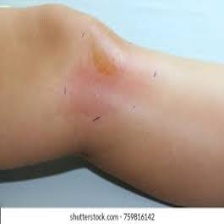

In [13]:
PIL.Image.open(sd_test_dict["BA-cellulitis"][8])

In [14]:
img_size = (224,224)
x,y=[],[]

for name, images in sd_train_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        re_img = cv2.resize(img,img_size)
        x.append(re_img)
        y.append(labels[name])

In [15]:
xtest,ytest=[],[]

for name, images in sd_test_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        re_img = cv2.resize(img,img_size)
        xtest.append(re_img)
        ytest.append(labels[name])

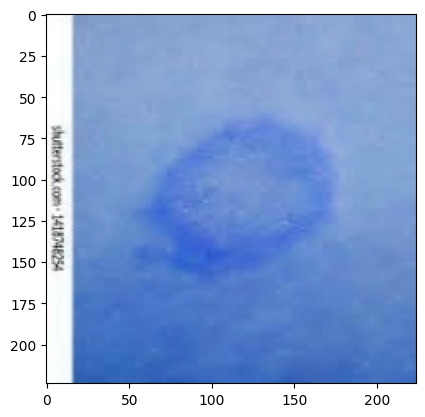

In [16]:
plt.imshow(x[490])

In [17]:
x_train = np.array(x,dtype=float)/255.0
x_test = np.array(xtest,dtype=float)/255.0
y_train = np.array(y)
y_test = np.array(ytest)

In [18]:
mobileNet = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"

In [21]:
import tensorflow_hub as hub
from tensorflow import keras
import tensorflow as tf
import tf_keras as tfk

In [22]:
mNet = hub.KerasLayer(mobileNet, input_shape=(224, 224, 3), trainable=False)

In [23]:
model  = tfk.Sequential([
    mNet,
    tfk.layers.Dense(170,'relu'),
    tfk.layers.Dense(8,'softmax')
])

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [25]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
29/29 [==============================] - 36s 964ms/step - loss: 0.7369 - accuracy: 0.7741
Epoch 2/5
29/29 [==============================] - 28s 959ms/step - loss: 0.1106 - accuracy: 0.9686
Epoch 3/5
29/29 [==============================] - 27s 952ms/step - loss: 0.0377 - accuracy: 0.9957
Epoch 4/5
29/29 [==============================] - 27s 933ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 5/5
29/29 [==============================] - 30s 1s/step - loss: 0.0110 - accuracy: 1.0000


In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

8/8 [==============================] - 7s 737ms/step - loss: 0.0949 - accuracy: 0.9786
Test Accuracy: 0.9786, Test Loss: 0.0949


In [28]:
yp= model.predict(x_test)

8/8 [==============================] - 7s 829ms/step


In [30]:
y_pred_classes = yp.argmax(axis=1)

In [34]:
import cv2
import numpy as np
import tensorflow as tf

def preprocess_image(image_path, img_size=(224, 224)):
    img = cv2.imread(image_path)  # Read the image
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")  # Raise error if image is invalid
    img = cv2.resize(img, img_size)  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


# Function to predict the disease
def predict_disease(model, image_path, labels_dict):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)  # Get the highest probability class
    disease_name = list(labels_dict.keys())[list(labels_dict.values()).index(predicted_class)]
    return disease_name

# Example usage
image_path = "/content/S_0618_impetigo_on_face_of_child_M.2e16d0ba.fi.width-320_CpIcgpI.jpg"  # Replace with your image path
disease = predict_disease(model, image_path, labels)
print(f"Predicted Disease: {disease}")


1/1 [==============================] - 0s 52ms/step
Predicted Disease: BA-impetigo
